# Parte 1 - Modulacion de amplitud

La modulación de amplitud es el proceso de cambiar la amplitud de una señal portadora de frecuencia relativamente alta, en proporcion con el valor instantaneo de la señal modulante de frecuencia relativamente mas baja.

## Características:
- Poco costosa la modulación y demodulación
- Baja calidad
- Usada para audio y video 

## Modulador:
Es un dispositivo no lineal con dos entradas (señal de portadora y de mensaje) y una salida (señal modulada)

## Tipos de modulacione de amplitud
- BLU (banda lateral unica) en ingles SSB (single side band)
- DBL-Ps (doble banda lateral con portadora suprimida)
- AM (amplitud modulada)
- BLV (Banda lateral vestigial)

# Transmision

$y(t)=f(t).cos(\omega_c .t+\phi(t))$
## aplicando la trasnformada de Fourier
$Y(\omega)=\frac{1}{2} F(\omega-\omega_c)+\frac{1}{2} F(\omega+\omega_c)$
<img src=".\1.png">

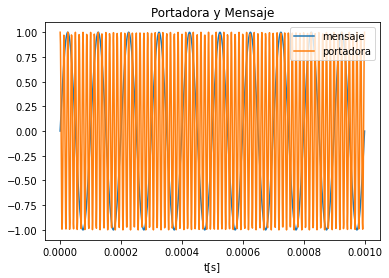

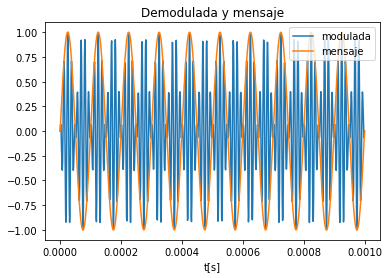

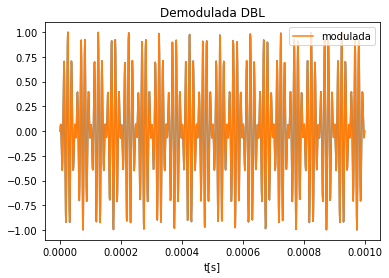

In [2]:
import numpy as np
import matplotlib.pyplot as plt
N=1000
t=np.linspace(0,1e-3,N) # un eje de tiempo de 1ms muestreado a 1us genera 1000 muestras
ts=t[1] # el primer diferencia entre la posicion "0" del vector de tiempo y la "1" es el tiempo de muestreo
fs=1/ts # la frecuencia de muestreo es la inversa del tiempo de muestreo
fmsj=10000 # frecuencia del mensaje Hz
fc=80000 # frecuencia de la portadora Hz

msj=np.sin(2*np.pi*fmsj*t)
carrier=np.cos(2*np.pi*fc*t)
plt.figure()

plt.plot(t,msj,label="mensaje")
plt.plot(t,carrier,label="portadora")
plt.legend(loc='upper right')
plt.xlabel("t[s]")
plt.ticklabel_format(style="sci")
plt.title("Portadora y Mensaje")


######################
### la modulación ####
######################
def M_DBL(a,b):  # es muy sencillo...solamente es el producto, que en la practica se hace con un mezclador aca con numeros
    return a*b

DBL= M_DBL(msj,carrier)
plt.figure()

plt.plot(t,DBL,label="modulada")
plt.plot(t,msj,label="mensaje")
plt.legend(loc='upper right')
plt.xlabel("t[s]")
plt.title("Demodulada y mensaje")
plt.ticklabel_format(style="sci")


plt.figure()
plt.plot(t,DBL)
plt.plot(t,DBL,label="modulada")
plt.legend(loc='upper right')
plt.xlabel("t[s]")
plt.title("Demodulada DBL")
plt.ticklabel_format(style="sci")



Text(0.5, 1.0, 'Espectro')

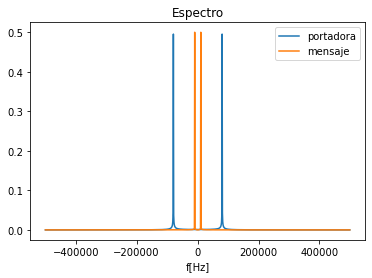

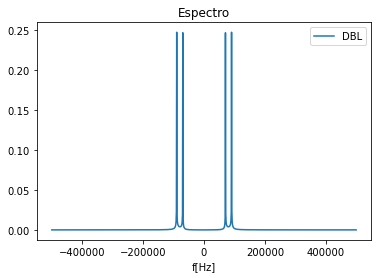

In [3]:
# en el espectro
fcia=np.linspace(-fs/2,fs/2,N)
Fcarrier=np.abs(np.fft.fftshift(np.fft.fft(carrier)))/N
Fmsj=np.abs(np.fft.fftshift(np.fft.fft(msj)))/N
plt.figure()
plt.plot(fcia,Fcarrier,label="portadora")
plt.plot(fcia,Fmsj,label="mensaje")
plt.legend(loc='upper right')
plt.xlabel("f[Hz]")
plt.title("Espectro")


FDBL=np.abs(np.fft.fftshift(np.fft.fft(DBL)))/N
plt.figure()
plt.plot(fcia,FDBL,label="DBL")
plt.legend(loc='upper right')
plt.xlabel("f[Hz]")
plt.title("Espectro")


## Representación fasorial

La modulacion de doble banda lateral consiste unicamente en una translación de frecuencia.
El mensaje como señal real tiene un espectro simetrico que es delplazado a la frecuencia de portadora. Este desplazamito genera la aparicion de las 2 bandas laterales simétricas que portan la misma información.

<img src=".\1,5.png">

# Recepción

La demodulación, es decir, la recuperación de la información de la señal original requiere nuevamente otra translacion del espectro.

$f(t).cos(\omega_c.t) . cos(\omega_c.t) = f(t).cos(\omega_c .t)^2$ 

reemplazando en el segundo termino 

$f(t).cos(\omega_c.t) . cos(\omega_c.t) = \frac{1}{2}.f(t)+\frac{1}{2}.f(t).cos(2.\omega_c .t)$

aplicando Fourier a ambos lados

$F\{f(t).cos(\omega_c.t) . cos(\omega_c.t)\}=F\{\frac{1}{2}.f(t)+\frac{1}{2}.f(t).cos(2.\omega_c .t)\}$

<img src=".\2.png">

Lo que obtenemos a la salida del mezclado que realiza la multiplicación por $cos(\omega_c.t)$

$F\{f(t).cos(\omega_c.t) . cos(\Omega_c.t)\}=\frac{1}{2}.F(\omega)+\frac{1}{4}.F(\omega - 2.\omega_c)+\frac{1}{4}.F(\omega + 2.\omega_c)$


Text(0.5, 1.0, 'Producto de DBL.carrier')

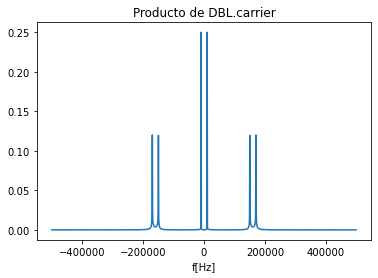

In [4]:
DBL_rx=DBL*carrier

FDBL_rx=np.abs(np.fft.fftshift(np.fft.fft(DBL_rx)))/N
plt.figure()
plt.plot(fcia,FDBL_rx)
plt.xlabel("f[Hz]")
plt.title("Producto de DBL.carrier")

Nos queda la tarea de eliminar la parte alta del espectro implementando un filtro pasa bajos.

scipy.signal.firwin(numtaps, cutoff, width=None, window='hamming', pass_zero=True, scale=True, nyq=None, fs=None)


Text(0.5, 1.0, 'Espectro')

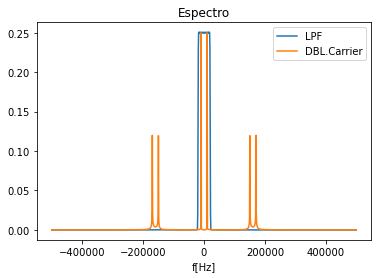

In [5]:
from scipy import signal as dsp
taps=dsp.firwin(N,cutoff=20000,fs=fs)
LPF=np.abs(np.fft.fftshift(np.fft.fft(taps)))/N
plt.figure()
plt.plot(fcia,LPF*(N/4),label="LPF")  ## escale en (N/4) asi el filtro que sobre la es espectro como en el libro
plt.plot(fcia,FDBL_rx,label="DBL.Carrier")
plt.legend(loc='upper right')
plt.xlabel("f[Hz]")
plt.title("Espectro")

Text(0.5, 0, 't[ms]')

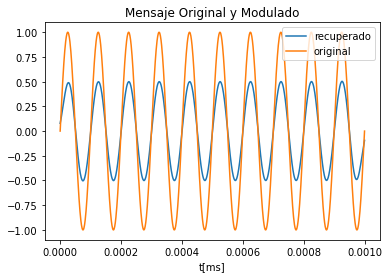

In [6]:
## Tranca... aca solamente hay que hacer el proceso de filtrado, convolucionando la respuesta del 
## filtro con la señal de salida del mezclador

def DEMOD_DBL(a,b,taps):
    c=a*b
    return np.convolve(c,taps,'same')

Rx=DEMOD_DBL(DBL,carrier,taps)

Rx=np.convolve(taps,DBL_rx,'same')
plt.plot(t,Rx,label="recuperado")
plt.plot(t,msj,label="original")
plt.legend(loc='upper right')
plt.title("Mensaje Original y Modulado")
plt.xlabel("t[ms]")


# Detección sincronica

Hasta aca parece todo facil, pero quedan muchas cosas interesantes para analizar.

Por ejemplo:
- que pasa con la fase relativa de la portadora durante la modulación???

Text(0.5, 1.0, 'Inversión de fase de portadora')

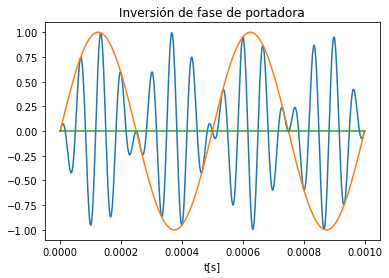

In [7]:
fmsj=2000 # frecuencia del mensaje Hz
fc=15000 # frecuencia de la portadora Hz

msj=np.sin(2*np.pi*fmsj*t)
carrier=np.cos(2*np.pi*fc*t)

plt.plot(t,M_DBL(msj,carrier),t,msj,t,np.zeros(N))
plt.xlabel("t[s]")
plt.title("Inversión de fase de portadora")



# EJERCICIO 1

 - como mensaje utilizar una señal cuadrada y que a partir del 3er armonico no entre en el filtro pasabajos
 - simular y generar las imagenes correspondientes a la señal original y recuperada despues de la demodulación
 - Que sucede si en vez de utilizar una señal senoidal de portadora utilizamos una señal cuadrada?
 - simular y generar las imagenes correspondientes a la señal original y recuperada despues de la demodulación
 - Que sucede si en vez de utilizar una señal senoidal de portadora utilizamos una exponencial compleja?
 - simular y generar las imagenes correspondientes a la señal original y recuperada despues de la demodulación

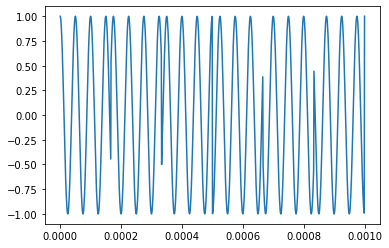

In [8]:
def mod_DBL1(mensaje,portadora):
    return mensaje*portadora

def demod_DBL1(modulada,portadora,filtro):
    mensaje=np.convolve(filtro,modulada*portadora,"same")
    return mensaje

n=1000
fm=3e3
fp=20e3
t=np.linspace(0,0.001,n)
T=t[1]-t[0]
f=1/T
mensaje1=dsp.square(2*np.pi*fm*t)
portadora=np.cos(2*np.pi*fp*t)

resultado=mod_DBL1(mensaje1,portadora)
plt.plot(t,resultado)

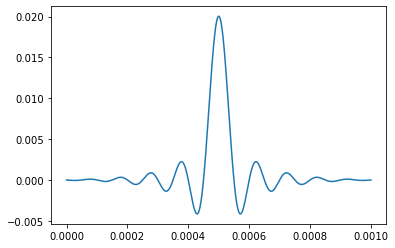

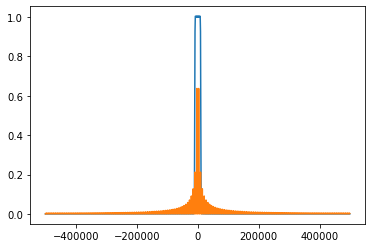

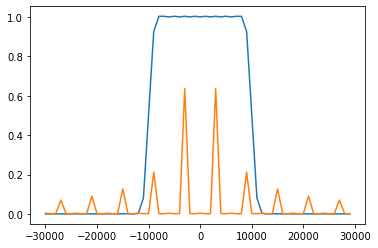

In [9]:
mensaje_f=np.fft.fftshift(np.fft.fft(mensaje1))/n
resultado_f=np.fft.fftshift(np.fft.fft(resultado))/n
frecuencia=np.linspace(-f/2,f/2,n,endpoint=False)

# Sólo debo dejar pasar hasta el 3° armónico (como la onda cuadrada es de 3KHz, el tercer armónico estará a 9KHz), por lo
# tanto armo un filtro que corte en 10KHz, dejando fuera el 5° armónico (15KHz)

taps=dsp.firwin(n,cutoff=10000,fs=f)
taps_f=np.fft.fftshift(np.fft.fft(taps))
plt.plot(t,taps)
plt.figure()
plt.plot(frecuencia,abs(taps_f),frecuencia,abs(mensaje_f))

#para que se vea claro que sólo pasa hasta el tercer armónica
plt.figure()
plt.plot(frecuencia[470:530],abs(taps_f)[470:530],frecuencia[470:530],abs(mensaje_f)[470:530])

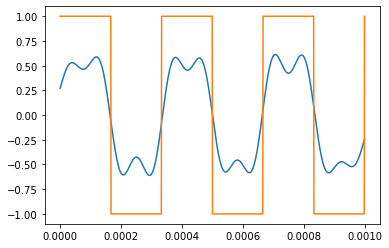

In [10]:
#recupero la señal original
mensaje1_recuperado=demod_DBL1(resultado,portadora,taps)
plt.plot(t,mensaje1_recuperado,t,mensaje1) #grafico el recuperado y el original juntos

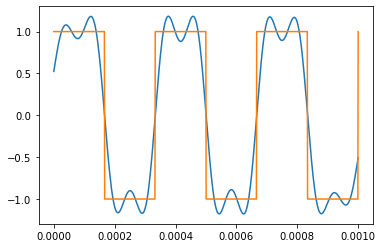

In [11]:
#Si usamos una señal cuadrada de portadora
portadora2=dsp.square(2*np.pi*fp*t)

resultado2=mod_DBL1(mensaje1,portadora2)

#recupero la señal original
mensaje2_recuperado=demod_DBL1(resultado2,portadora2,taps)
plt.plot(t,mensaje2_recuperado,t,mensaje1) #grafico el recuperado y el original juntos


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


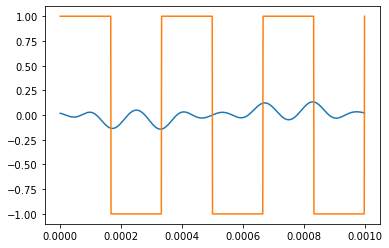

In [12]:
#Si usamos una señal exponencial compleja de portadora
portadora3=np.exp(2j*np.pi*fp*t)

resultado3=mod_DBL1(mensaje1,portadora3)

#recupero la señal original
mensaje3_recuperado=demod_DBL1(resultado3,portadora3,taps)
plt.plot(t,mensaje3_recuperado,t,mensaje1) #grafico el recuperado y el original juntos

## Problemas en la recepción

La fase de la portadora cambia 180 grados cuando el mensaje cambia de signo.
Es decir que si pudieramos seguir la fase de la portadora poriamos saber que signo tiene el mensaje.
Lo otro muy importante es que para recuperar el mensaje no alcanza solamente con recuperar la envolvente de la portadora.

- Que pasa si el receptor no multiplica exactamente pot la misma señal cos(wc.t) que hizo el Tx en el proceso de demodulacion??

si $\phi(t)$ es una señal modulada en DBL con el $cos(\omega_c .t)$ y queremos recuperar el mensaje en el receptor con una señal $cos((\omega_c + \Delta\omega) .t + \Delta\theta)$

Se puede demostras que la salida del demodulador queda

$Rx=\frac{1}{2}.f(t).cos(\Delta\omega_t + \Delta\phi)$

Es decir que la salida que tendriamos en condiciones normales $\frac{1}{2}.f(t)$ queda multiplicada por $cos(\Delta\omega_t + \Delta\phi)$

Analicemos 2 casos:

1) $\Delta\omega = 0$ y $\Delta\phi = variable$

2) $\Delta\omega = variable$ y $\Delta\phi = 0$

Para el caso 1) donde $\Delta\omega = 0$ y $\Delta\phi = variable$

se observa que un error en la fase se ve reflejada en una atenuacion en la señal recibida.

$Rx=\frac{1}{2}.f(t).cos(\Delta\phi)$

Era de imaginarse, ya que el coseno que simulamos varia entre 1 y 0 modulando la amplitud del mensaje


En el caso 2) $\Delta\omega = variable$ y $\Delta\phi = 0$

La salida queda multiplicada por la diferencia de frecuecia

$Rx=\frac{1}{2}.f(t).cos(\Delta\omega_t )$

El sonido es como un batido entre las dos frecuencias

# EJERCICIO 2
- Graficar la detección del mensajes para diferentes 0°,15°,45°,75° y 90°
- Que pasa cuando el angulo de desfasaje es 90° 
- Simular para diferencias de fase mayores a 90° y menores a 360°.
- Extraer conclusiones.
- Simular la demodulacion del mensaje para errores de frecuencia de -2000,-1000,+1000,+2000

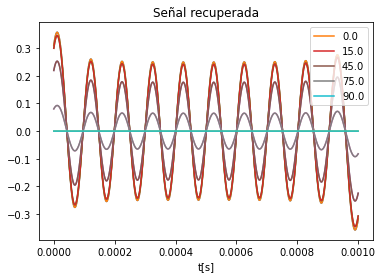

In [13]:
DeltaFase=[0,np.deg2rad(15),np.deg2rad(45),np.deg2rad(75),np.deg2rad(90)]

fmsj=10000 # frecuencia del mensaje Hz
fc=80000 # frecuencia de la portadora Hz

msj=np.sin(2*np.pi*fmsj*t)
carrier=np.cos(2*np.pi*fc*t)

DBL=M_DBL(msj,carrier)


for fase in DeltaFase:
    Rx=DEMOD_DBL(DBL,np.cos(2*np.pi*fc*t+fase),taps)
    plt.plot(t,Rx)
    plt.plot(t,Rx,label=round(np.rad2deg(fase),1))

    plt.legend(loc='upper right')

    plt.title("Señal recuperada")

    plt.xlabel("t[s]")

Cuando el ángulo de defase es 90°, las señales son ortogonales, por lo tanto da como resultado 0.

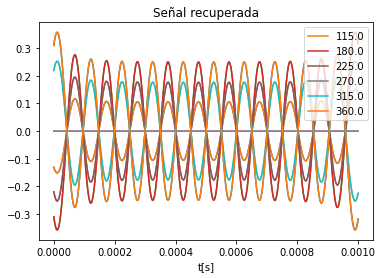

In [14]:
DeltaFase=[np.deg2rad(115),np.deg2rad(180),np.deg2rad(225),np.deg2rad(270),np.deg2rad(315),np.deg2rad(360)]

for fase in DeltaFase:
    Rx=DEMOD_DBL(DBL,np.cos(2*np.pi*fc*t+fase),taps)
    plt.plot(t,Rx)
    plt.plot(t,Rx,label=round(np.rad2deg(fase),1))

    plt.legend(loc='upper right')

    plt.title("Señal recuperada")

    plt.xlabel("t[s]")

De 90° a 270°, la señal recuperada cambia su signo respecto a la original. A los 270° vuelve a ser 0 ya que es igual a un defase de -90°. Entre los 270° y 360°, sucede lo mismo que entre los 0° y 90°.

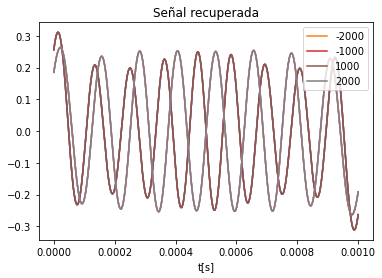

In [15]:
fmsj=10000 # frecuencia del mensaje Hz
fc=80000 # frecuencia de la portadora Hz

DeltaFrec=[-2000,-1000,1000,2000]

msj=np.sin(2*np.pi*fmsj*t)
carrier=np.cos(2*np.pi*fc*t)

DBL=M_DBL(msj,carrier)


for frec in DeltaFrec:
    Rx=DEMOD_DBL(DBL,np.cos(2*np.pi*(fc+frec)*t),taps)
    plt.plot(t,Rx)
    plt.plot(t,Rx,label=round(frec,1))

    plt.legend(loc='upper right')

    plt.title("Señal recuperada")

    plt.xlabel("t[s]")

# Modulacion en Doble banda Lateral en cuadratura

Del problema analizado de la diferencia de fase entre la portadora suprimida del Tx y la portadora del Rx utilizada para la demodulación un caso curioso se daba para una diferencia de fase de 90°

vamos a hacer lo siguiente

Text(0.5, 0, 'f[Hz]')

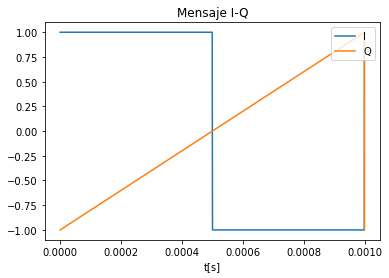

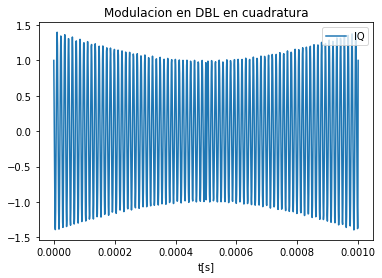

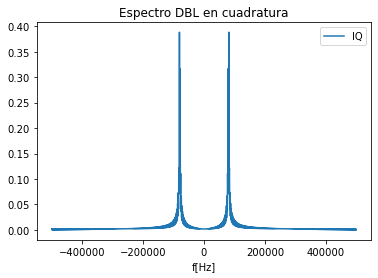

In [16]:


fmsj=1000 # frecuencia del mensaje Hz
fc=80000 # frecuencia de la portadora Hz

Q=dsp.sawtooth(2*np.pi*fmsj*t)
I=dsp.square(2*np.pi*fmsj*t)

plt.figure()
plt.plot(t,I,label="I")
plt.plot(t,Q,label="Q")
plt.legend(loc='upper right')
plt.title("Mensaje I-Q")
plt.xlabel("t[s]")

I_mod=M_DBL(I,np.cos(2*np.pi*fc*t))
Q_mod=M_DBL(Q,np.sin(2*np.pi*fc*t))

QUAD=I_mod+Q_mod
plt.figure()
plt.plot(t,QUAD,label="IQ")
plt.legend(loc='upper right')
plt.title("Modulacion en DBL en cuadratura")
plt.xlabel("t[s]")

FQUAD=np.abs(np.fft.fftshift(np.fft.fft(QUAD)))/N
plt.figure()
plt.plot(fcia,FQUAD,label="IQ")
plt.legend(loc='upper right')
plt.title("Espectro DBL en cuadratura")
plt.xlabel("f[Hz]")

Text(0.5, 0, 't[s]')

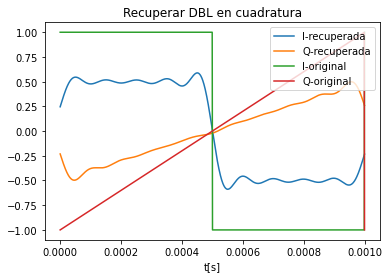

In [17]:
RxI=DEMOD_DBL(QUAD,np.cos(2*np.pi*fc*t),taps)
RxQ=DEMOD_DBL(QUAD,np.sin(2*np.pi*fc*t),taps)

plt.plot(t,RxI,label="I-recuperada")
plt.plot(t,RxQ,label="Q-recuperada")
plt.plot(t,I,label="I-original")
plt.plot(t,Q,label="Q-original")
plt.legend(loc='upper right')
plt.title("Recuperar DBL en cuadratura")
plt.xlabel("t[s]")

# EJERCICIO 3

- Hacer una funcion que reciba como parametros mensajeI, mensajeQ, CarrierI, CarrierQ y devuelva una señana modulada en cuadratura.
- Idem funcion para demodular


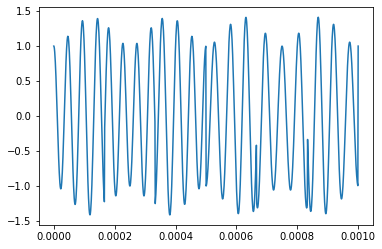

In [18]:
def moduladora_en_cuadratura(mensajeI,mensajeQ,CarrierI,CarrierQ):
    resultado1=mensajeI*CarrierI
    resultado2=mensajeQ*CarrierQ
    return resultado1+resultado2

fm3=2e3
mensaje3 = np.sin(2*np.pi*fm3*t)

#uso la misma cuadrada creada en el ejercicio 1
#genero una nueva portadora desfazada 90° para el nuevo mensaje
portadora4=np.cos(2*np.pi*fp*t + np.pi/2)
resultado3=moduladora_en_cuadratura(mensaje1,mensaje3,portadora,portadora4)
plt.plot(t,resultado3)

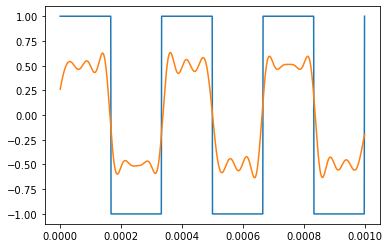

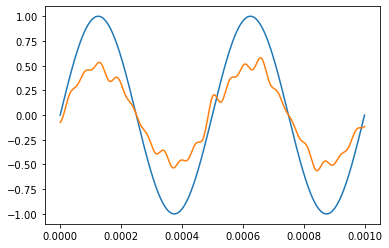

In [19]:
#Recupero ambas señales por separado usando el demodulador
taps=dsp.firwin(n,cutoff=20000,fs=f)

plt.plot(t,mensaje1) #mensaje1 original
plt.plot(t,demod_DBL1(resultado3,portadora,taps)) #mensaje1 recuperado

plt.figure()

plt.plot(t,mensaje3) #mensaje3 original
plt.plot(t,demod_DBL1(resultado3,portadora4,taps)) #mensaje3 recuperado

# AMPLITUD MODULADA

$\Phi_{AM}(t)=f(t).cos(\omega_c . t) + A.cos(\omega_c . t)$

sacando factor común

$\Phi_{AM}(t)=(A+f(t)).cos(\omega_c . t) $

<img src=".\3.png">

Aplicando Fourier

$\Phi_{AM}(\omega)=\frac{1}{2}.[F(\omega-\omega_c)+F(\omega+\omega_c)+A.\delta(\omega+\omega_c)+A.\delta(\omega-\omega_c)] $


## Diagrama fasoria de una señal de AM

<img src=".\4.png">
De la representacoion fasorial se deducen:
- Vc + Vs + Vi = Vmax
- -Vc - Vs - Vi = Vmin



## Coeficiente de modulación
Describe la cantidad de cambio de la amplitud de la portadora.

$m=\frac{Em}{Ec}$

Donde:
- Em: es la variacion maxima de la salida
- Ec: es la rension de la portadora sin modulacion
<img src=".\6.png">

Como el proceso de modulacion es simétrico, (las diferencias en amplitud positiva y negativa son iguales)

$Em=\frac{1}{2}(V_{max} - V_{min})$
$Ec=\frac{1}{2}(V_{max} + V_{min})$

Reemplazando 

$m=\frac{Em}{Ec}$

$m=\frac{\frac{1}{2}(V_{max} - V_{min})}{\frac{1}{2}(V_{max} + V_{min})}$

$m=\frac{(V_{max} - V_{min})}{(V_{max} + V_{min})}$

El cambio maximo de la amplitud de salida "Em" es igual a la suma faorial de la BLI y la BLS

$E_m=BLI+BLS$

$BLI=BLS = BL$ 

$\frac{E_m}{2}=\frac{\frac{1}{2}(V_{max}-V{min})}{2}$

La amplitud de las bandas laterales BL = BLI = BLS = $\frac{1}{4}(V_{max}-V{min})$

100% de modulación m=1 hace que Ec = Em

### La expresion de una señana modulada en AM en función de "m" es:

$V_{AM}=[1+m.sen(2.\pi.f_m.t)].sen(2.\pi . f_c .t)$

Text(0.5, 0, 't[s]')

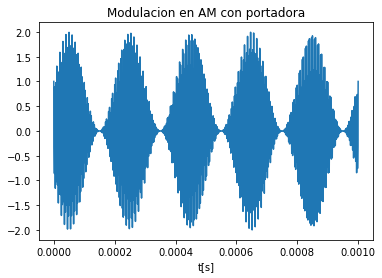

In [20]:
m=1
Ec=1
fmsj=5000
fc=300000 # frecuencia de la portadora Hz

#msj=dsp.sawtooth(2*np.pi*fmsj*t)   # triangular
#msj=dsp.square(2*np.pi*fmsj*t)      # cuadrada

msj=np.sin(2*np.pi*fmsj*t)          # senoidal
carrier=Ec*np.cos(2*np.pi*fc*t)

def M_AM(msj,carrier,m):
    return ((1+m*msj)*carrier)

VAM=M_AM(msj,carrier,m)

plt.plot(t,VAM)
plt.title("Modulacion en AM con portadora")
plt.xlabel("t[s]")


## Espectro de AM

Partiendo de 

$V_{AM}=[1+m.sen(2.\pi.f_m.t)].Ec.sen(2.\pi . f_c .t)$

$V_{AM}=Ec.sen(2.\pi . f_c .t)+\frac{m.Ec}{2}.sen(2.\pi.(f_c-f_m).t)+\frac{m.Ec}{2}.sen(2.\pi.(f_c+f_m).t)$

Text(0.5, 0, 'f[Hz]')

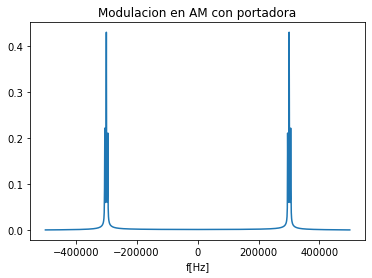

In [21]:
FAM=np.abs(np.fft.fftshift(np.fft.fft(VAM)))/N
plt.figure()
plt.plot(fcia,FAM)
plt.title("Modulacion en AM con portadora")
plt.xlabel("f[Hz]")

## Potencia de una señal de AM

La potencia de la portadora
$Pc=({\frac{Ec}{\sqrt{2}}})^2 $

Potencia de la banda lateral inferior = banda lateral superior
$PBL=({\frac{\frac{m.Ec}{2}}{\sqrt{2}}})^2 $

La potencia total
$Pt=Pc+\frac{m^2}{4}.Pc+\frac{m^2}{4}.Pc$

con un indice de modulacion m=1 

Pt=Pc.(3/2)

despejando

Pc=Pt.(2/3)

2/3 de la potencia se gasta en la portadora, que no lleva ninguna información.
La eficiencia de AM es bajisima, pero muy facil de demodular



In [22]:
Pc=np.mean(carrier*np.conjugate(carrier))  # la expresion de la potencia
print ("La potencia de la portadora es {} W sobre 1ohm ".format(Pc))

Pt=Pc*(1+(m**2)/2)
print ("La potencia total de la señal de AM {} W sobre 1ohm ".format(Pt))


La potencia de la portadora es 0.5005000000000002 W sobre 1ohm 
La potencia total de la señal de AM 0.7507500000000003 W sobre 1ohm 


In [23]:
Pt=np.mean(VAM*np.conjugate(VAM))  # la expresion de la potencia
print ("La potencia total de la señal de AM {} W sobre 1ohm ".format(Pt))


La potencia total de la señal de AM 0.7502499999999995 W sobre 1ohm 


Coincidiendo la expresion de la potencia de AM y la aplicacion de la formula sobre la señal generada

# EJERCICIO 4

implementar un demodulador de AM que reciba una señal modulada en AM, un float con el valor de la frecuencia de portadora,un float con la frecuencia de muestreo fs y los taps del filtro y devuelva el mensaje

- cambiar la generacion de portadora entre seno coseno, agregar fases (Variable carrier)
- Como es la deteccion??
- Que pasa si en vez de np.exp() en el demodulador usamos sp.sin() o np.cos() ??

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


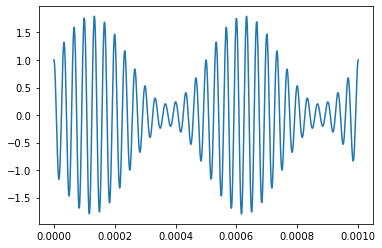

In [24]:
#Primero modulo la señal AM
def modulador_AM(msj,prt,m):
    return (1+m*msj)*prt

fm4=2e6
fp4=30e6

mensaje4=np.sin(2*np.pi*fm4*t)
portadora5=np.exp(2j*np.pi*fp4*t)
m=0.8

señalAM=modulador_AM(mensaje4,portadora5,m)
plt.plot(t,señalAM)

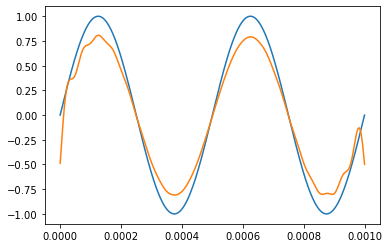

In [25]:
def demodulador_AM4(AM,prt,fs,filtro):
    mensaje=abs(AM*prt)
    env=np.convolve(mensaje,filtro,"same")
    Em=(max(env)-min(env))/2
    return env-Em/m

taps=dsp.firwin(n,cutoff=20000,fs=f)
plt.plot(t,mensaje4,t,demodulador_AM4(señalAM,portadora5,f,taps))

La detección es sincrónica.

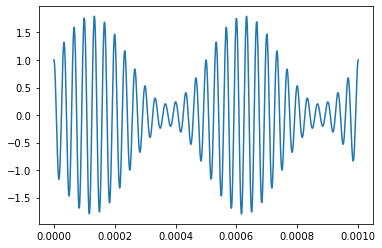

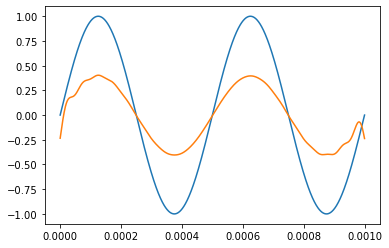

In [26]:
portadora6=np.cos(2*np.pi*fp4*t)

señalAM_cos=modulador_AM(mensaje4,portadora6,m)

plt.plot(t,señalAM_cos)
plt.figure()
plt.plot(t,mensaje4,t,demodulador_AM4(señalAM_cos,portadora6,f,taps))

Vemos que en este caso la amplitud de la señal recuperada se disminuye a la mitad.

#  Derector de envolvente.

La ventaja de AM y el agregado de la portadora es simplificar la detección.
Un detector de envolvente no sabe nada de la frecuencia de portadora ni de su fase

- Rectifica
- aplica pasabajos

Text(0.5, 0, 't[s]')

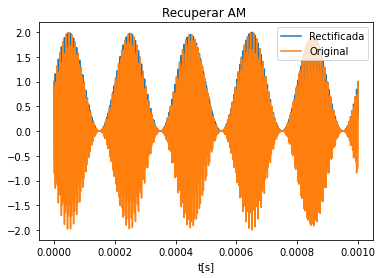

In [27]:
VAM_rec=[]
for sample in range(len(VAM)):
#    print(sample)
    if VAM[sample]>0:
        VAM_rec.append(VAM[sample])
    else:
        VAM_rec.append(-VAM[sample])
    
plt.plot(t,VAM_rec,label="Rectificada")
plt.plot(t,VAM,label="Original")   
plt.legend(loc='upper right')
plt.title("Recuperar AM ")
plt.xlabel("t[s]")


Quizas no sea tan intuitivo, pero el hecho de haber rectificado la señal (lo mismo que hace el puente de diodos de los circuitos de detección o la piedra de Galena) hizo algo muy importante....veamos el espectro.

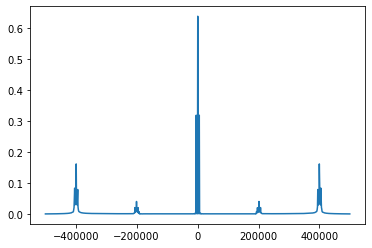

<Figure size 432x288 with 0 Axes>

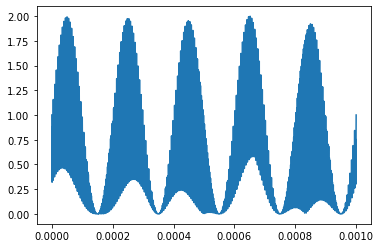

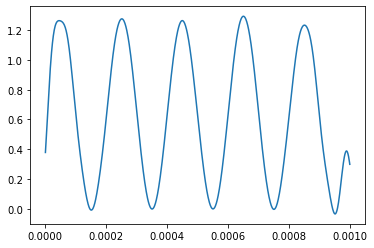

In [28]:
FAM=np.abs(np.fft.fftshift(np.fft.fft(VAM_rec)))/N
plt.figure()
plt.plot(fcia,FAM)

taps=dsp.firwin(N,cutoff=20000,fs=fs)  # mi viejo viltro pasabajos de 20kHz
plt.figure()
envolvente=np.convolve(VAM_rec,taps,"same")
plt.figure()
plt.plot(t,VAM_rec)
plt.figure()
plt.plot(t,envolvente)


## EJERCICIO 5

- Explicar las diferencias entre demodulación sicrónica y asincrónica

La principal diferencia es que en el caso de la demodulación sincrónica el receptor necesita la señal modulada y la portadora para realizar la demodulación. En cambio, en la asincrónica no se necesita de la portadora, lo que es una ventaja porque el receptor necesita menos información para recuperar la señal original. La demodulación sincrónica tiene la desventaja de ser más compleja, pero es más eficiente para recuperar la señal.

## EJERCICIO 6
- hacer una funcion que reciba una señal modulada en AM, y los parametros que considere necesarios y retorne el indice de modulacion de la señal de AM.

In [29]:
def indice_modulacion(modulada,filtro):
    envolvente = np.convolve(filtro,abs(modulada),"same")
    Vmax=max(envolvente)
    Vmin=min(envolvente)
    m = (Vmax-Vmin)/(Vmax+Vmin)
    return m

print("Indice de modulacion = %.2f"%(indice_modulacion(señalAM,taps)))

Indice de modulacion = 0.80


# Banda Lateral Unica

Hasta aca analizamos la modulación y demodulacion de sistemas de doble banda lateral con y sin portadora generadas a travez de una traslación de frecuencias.
El uso de doble banda lateral tiene la consecuencia directa de utilizar el doble del ancho de banda del mensaje.
El sumar una señal portadora central hace mas sensilla la demodulacion pero conlleva un gasto de potencia innecesario, ya que no lleva información.

De las propiedades de la transformada de Fourier se puede demostrar que el espectro de toda señal real es par con simetria en $F(\omega)=0$. La idea es que la parte negativa del espectro no tiene información relevante (Simetría Hermítica $f((-x) = f(x)^*$) y puede ser descartada sin perdida de información.

De aqui se introduce el concepto conocido como "señal analitica" que es una señal compleja que no tiene componentes de espectro neganivos.

https://en.wikipedia.org/wiki/Analytic_signal

Estrictamente, no hay ningun sistema de radiodifusion que utilice BLU (SSB en ingles) "puro" pero en siertas condiciones señales de TV en banda lateral vestigial pueden interpretarse como de banda lateral unica.

Además es interesante comparar la performace contra DBL y AM


<img src=".\7.png" width="400">

## Generación

<img src=".\8.png" width="400">

suponiendo $f(t) = \cos(\omega_st)$ con su espectro en $\pm \omega_s$
portadora con $f(t) = \cos(\omega_ct)$ con su espectro en $\pm \omega_c$

el espectro de una señal en BLU esta dado por $\pm (\omega_c-\omega_s)$

tenemos que buscar generar $BLU= \cos(\omega_c-\omega_s).t$

utilizando la identidad trigonometrica

$\cos(\omega_c-\omega_s).t=cos(\omega_c.t).cos(\omega_s.t)+sen(\omega_c.t).sen(\omega_s.t)$



Esta señal puede construirse con un modulador (producto) y desfasadores de -90° para la portadora y para el mensaje.

<img src=".\9.png" width="500">

$BLU= f(t).\cos(\omega_ct)+f_h(t).sen(\omega_ct)$

donde $f_h(t)$ es el mensaje desfasado -90°

Tenemos que buscar una funcion transferencia que no modifique las amplitudes, pero que desplace la fase

<img src=".\10.png" width="700">

formalmente, $f_h(t)$ es la trasnformada de Hilbert de la función $f(t)$


Cómo será la transformada de Hilber de las funciones tipicas que conocemos?

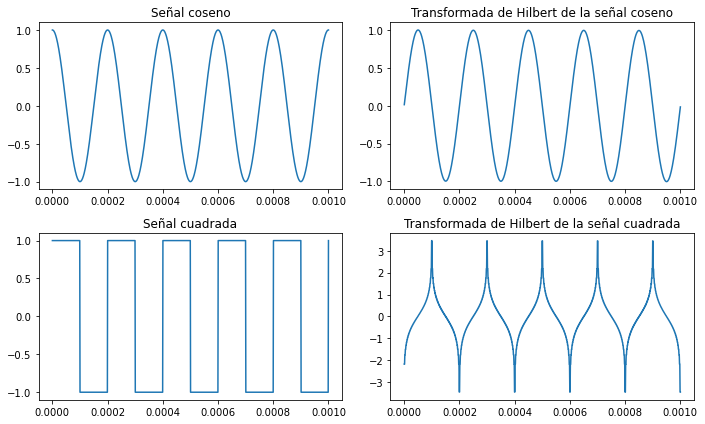

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from scipy.signal import square

# Definimos una señal senoidal y una señal cuadrada con la misma frecuencia
N=1000
t=np.linspace(0,1e-3,N) # un eje de tiempo de 1ms muestreado a 1us genera 1000 muestras
ts=t[1] # el primer diferencia entre la posicion "0" del vector de tiempo y la "1" es el tiempo de muestreo
fs=1/ts # la frecuencia de muestreo es la inversa del tiempo de muestreo
fmsj=5000 # frecuencia del mensaje Hz

x_seno=np.cos(2*np.pi*fmsj*t)
x_cuad=square(2*np.pi*fmsj*t)

# Calculamos la transformada de Hilbert de ambas señales
x_seno_hilbert = hilbert(x_seno)
x_cuad_hilbert = hilbert(x_cuad)

# Graficamos las señales y sus transformadas de Hilbert
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
axs[0, 0].plot(t, x_seno)
axs[0, 0].set_title('Señal coseno')
axs[0, 1].plot(t, np.imag(x_seno_hilbert))
axs[0, 1].set_title('Transformada de Hilbert de la señal coseno')
axs[1, 0].plot(t, x_cuad)
axs[1, 0].set_title('Señal cuadrada')
axs[1, 1].plot(t, np.imag(x_cuad_hilbert))
axs[1, 1].set_title('Transformada de Hilbert de la señal cuadrada')
plt.tight_layout()
plt.show()


La forma analitica $S_a(t)$ de una señal $S(t)$ esta dada por 

$S_a(t)=S(t)+jS_h(t)$



In [31]:
def moduladorBLU(portadora,mensaje):
    return hilbert(portadora)*hilbert(mensaje)+portadora*mensaje

In [32]:
N=1000
t=np.linspace(0,1e-3,N) # un eje de tiempo de 1ms muestreado a 1us genera 1000 muestras
ts=t[1] # el primer diferencia entre la posicion "0" del vector de tiempo y la "1" es el tiempo de muestreo
fs=1/ts # la frecuencia de muestreo es la inversa del tiempo de muestreo
fmsj=20000 # frecuencia del mensaje Hz
fc=100000 # frecuencia de la portadora Hz

msj=np.sin(2*np.pi*fmsj*t)
carrier=np.cos(2*np.pi*fc*t)

blu= moduladorBLU(carrier,msj)

Text(0.5, 1.0, 'Espectro')

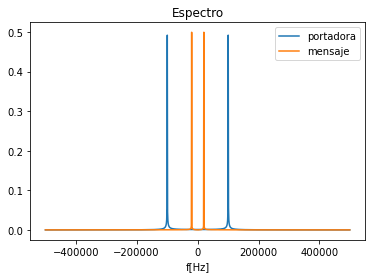

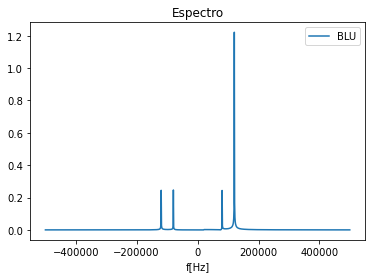

In [33]:
# en el espectro
fcia=np.linspace(-fs/2,fs/2,N)
Fcarrier=np.abs(np.fft.fftshift(np.fft.fft(carrier)))/N
Fmsj=np.abs(np.fft.fftshift(np.fft.fft(msj)))/N
plt.figure()
plt.plot(fcia,Fcarrier,label="portadora")
plt.plot(fcia,Fmsj,label="mensaje")
plt.legend(loc='upper right')
plt.xlabel("f[Hz]")
plt.title("Espectro")


FDBL=np.abs(np.fft.fftshift(np.fft.fft(blu)))/N
plt.figure()
plt.plot(fcia,FDBL,label="BLU")
plt.legend(loc='upper right')
plt.xlabel("f[Hz]")
plt.title("Espectro")

# TRABAJO FINAL

- leer el archivo am.csv utilizando la funcion np.genfromtxt() obtener
    - indice de modulacion
    - señal de audio demodulada
    - espectro de la señal de audio demodulada
    - distorsion armonica de la señal de audio

Indice de modulación = 1.0001235501617225


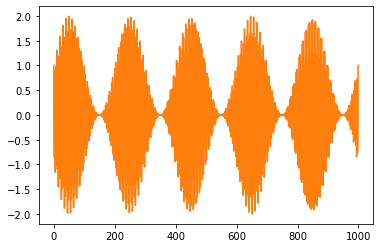

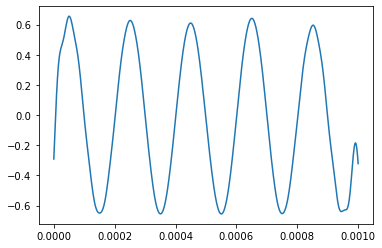

In [34]:
señal=np.genfromtxt("am.csv",delimiter=",") #leo la señal AM
plt.plot(señal)

t=señal[:,0]
v=señal[:,1]
f=1/(t[1]-t[0])
n=len(t)

taps=dsp.firwin(n,cutoff=30000,fs=f) #obtengo el nuevo filtro

def detector_envolvente(modulada,filtro):
    modulada=abs(modulada)
    envolvente=np.convolve(filtro,modulada,"same")
    return envolvente


m=indice_modulacion(v,taps)
envolvente=detector_envolvente(v,taps)
Em=(max(envolvente)-min(envolvente))/2
demodulada=envolvente-Em/m

plt.figure()
plt.plot(t,demodulada)
print("Indice de modulación =",m)

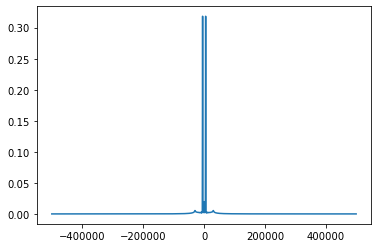

In [35]:
#espectro de la señal de audio demodulada
demodulada_f=np.fft.fftshift(np.fft.fft(demodulada))/n
frec=np.linspace(-f/2,f/2,n,endpoint=False)

plt.plot(frec,abs(demodulada_f))

In [43]:
def THD(espectro):
    f=np.argmax(espectro)  #ubico el primer armónico
    
    V1=espectro[f]
    V2=espectro[f*2]
    V3=espectro[f*3]
    V4=espectro[f*4]
    V5=espectro[f*5]
    V6=espectro[f*6]
    V7=espectro[f*7]    
    
    THD=(V2**2 + V3**2 + V4**2 + V5**2 + V6**2 + V7**2)/(V1**2)
    return THD

print("Distorsión Armónica de la señal de audio = %.2f%%"%(100*THD(abs(demodulada_f)[len(demodulada_f)//2:])))

Distorsión Armónica de la señal de audio = 0.06%


jupyter nbconvert --to slides modulacion_lineal.ipynb --post serv